In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
img = 256-plt.imread('data/eyeofthetiger.jpg')
img_N_half = int(img.shape[0]/2)

M = 2*img_N_half
x = np.linspace(-0.5,0.5,M,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],-x2.ravel()[:]]).transpose()
mu = img[:]
#plt.imshow(256-mu.reshape(M,M))

nfft2d = nfft.NFFT2D(M**2,2*img_N_half,2*img_N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/M**2
nfft2d.adjoint()
mu_hat = np.zeros([2*img_N_half,2*img_N_half],dtype=np.complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[img_N_half,img_N_half]

In [3]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
m = 96
t = np.linspace(0,2*np.pi,m,endpoint=False)
points.coords = np.zeros([m,2])
points.coords[:,1] = 0.2*np.cos(t)
points.coords[:,0] = 0.2*np.sin(t)
points_new = lorm.manif.ManifoldPointArray(e2)
L = 0.97*np.sqrt(2)*4

In [4]:
for k in range(1,12):
    N_half = 4*np.int(L/0.97)
    N=2*N_half
    m = points.coords.shape[0]
    energy = disc.energy_curveling_2d.plan(m,N,0.5,L)
    if img_N_half >= N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
    else:
        energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
    points_new.coords = np.zeros([m,2])

    print(N,m,energy._equality_constraint)
    
    energy._alpha = 100/energy._L**5
    method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
    points_new.coords[:] = points.coords[:]
    points_new = method.run(energy,points_new)
    
    np.savetxt("data/tiger_{}.txt".format(k),points_new.coords)
    
    tempc = points_new.coords
    m2 = len(tempc)
    temp = np.zeros([2*m2,2])
    for i in range(m2):
        temp[2*i,:] = tempc[i,:]
    for i in range(m2-1):
        temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
    temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

    points.coords = temp
    
    m = points.coords.shape[0]
    energy = disc.energy_curveling_2d.plan(m,N,0.5,L)
    if img_N_half >= N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
    else:
        energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
    points_new.coords = np.zeros([m,2])
    
    energy._L = L/0.97
    energy._alpha = 10000/(energy._L)**5
    method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
    points_new.coords[:] = points.coords[:]
    for l in range(k+1):
        points_new = method.run(energy,points_new)
    
    np.savetxt("data/tiger_{}_refined.txt".format(k),points_new.coords)
        
    L*=np.sqrt(2)

2048 196608 False
Initial value: f[0] = 5.904972147685479e-07
f[1] = 4.358112468806032e-07
f[2] = 4.239569533118609e-07
f[3] = 4.017368697922081e-07
f[4] = 3.758818008767064e-07
f[5] = 3.5209160320127675e-07
f[6] = 3.3253414937874145e-07
f[7] = 3.157322095421546e-07
f[8] = 3.0142684152706937e-07
f[9] = 2.899274954496553e-07
f[10] = 2.806713125404509e-07
f[11] = 2.73012120691596e-07
f[12] = 2.6667321044301447e-07
f[13] = 2.612987424018721e-07
f[14] = 2.5662102748759557e-07
f[15] = 2.526932585651074e-07
f[16] = 2.4949057370030906e-07
f[17] = 2.469345703776564e-07
f[18] = 2.4490118991317447e-07
f[19] = 2.432730165888275e-07
f[20] = 2.419472623644166e-07
f[21] = 2.4083689806229636e-07
f[22] = 2.3988334274349926e-07
f[23] = 2.3903596614506004e-07
f[24] = 2.382661931466024e-07
f[25] = 2.3754775864735197e-07
f[26] = 2.3688104486612008e-07
f[27] = 2.3625717283774132e-07
f[28] = 2.3565985122325665e-07
f[29] = 2.3507633912608431e-07
f[30] = 2.3450841150799462e-07
f[31] = 2.3395422448371465e-07
f

f[64] = 2.348780303532676e-07
f[65] = 2.347073325210107e-07
f[66] = 2.3453640667667238e-07
f[67] = 2.3436734111555125e-07
f[68] = 2.34202893784353e-07
f[69] = 2.340427924995329e-07
f[70] = 2.3388636285656048e-07
f[71] = 2.3373275289602165e-07
f[72] = 2.3358200539754536e-07
f[73] = 2.3343499463141222e-07
f[74] = 2.3328848572319144e-07
f[75] = 2.3313776849200892e-07
f[76] = 2.3298763779417267e-07
f[77] = 2.328351509623136e-07
f[78] = 2.326785308901797e-07
f[79] = 2.325179440294865e-07
f[80] = 2.323567486389025e-07
f[81] = 2.3219133995431362e-07
f[82] = 2.320220423454189e-07
f[83] = 2.3185165004815227e-07
f[84] = 2.31682226114047e-07
f[85] = 2.3151062504103541e-07
f[86] = 2.313410237350651e-07
f[87] = 2.311698088701052e-07
f[88] = 2.310009235078158e-07
f[89] = 2.3083306892117715e-07
f[90] = 2.306657240557893e-07
f[91] = 2.3049669405465647e-07
f[92] = 2.3032884423319748e-07
f[93] = 2.3016052766304376e-07
f[94] = 2.2999575602592856e-07
f[95] = 2.2983437122926327e-07
f[96] = 2.29676817126897

f[25] = 2.1760881486946803e-07
f[26] = 2.1758799204134627e-07
f[27] = 2.175662242553815e-07
f[28] = 2.1754363605634146e-07
f[29] = 2.175197756345369e-07
f[30] = 2.1749488538099553e-07
f[31] = 2.1746858229058044e-07
f[32] = 2.1744098698717277e-07
f[33] = 2.1741206984990585e-07
f[34] = 2.1738201932630022e-07
f[35] = 2.173512318517239e-07
f[36] = 2.173200964616777e-07
f[37] = 2.172879967421813e-07
f[38] = 2.1725661275701364e-07
f[39] = 2.1722522940840644e-07
f[40] = 2.1719439008531757e-07
f[41] = 2.1716333166704343e-07
f[42] = 2.1713219870229285e-07
f[43] = 2.17100986828206e-07
f[44] = 2.1707071565796728e-07
f[45] = 2.1704102642618553e-07
f[46] = 2.1701113669776713e-07
f[47] = 2.1698135755232578e-07
f[48] = 2.1695132209900587e-07
f[49] = 2.1692094645320877e-07
f[50] = 2.1688991747884535e-07
f[51] = 2.1685931878211585e-07
f[52] = 2.1682856900605132e-07
f[53] = 2.1679792271723506e-07
f[54] = 2.1676764151331522e-07
f[55] = 2.1673825823198348e-07
f[56] = 2.1671000696882933e-07
f[57] = 2.16683

f[88] = 2.150353017301738e-07
f[89] = 2.15031562760047e-07
f[90] = 2.1502779459412842e-07
f[91] = 2.1502400788638033e-07
f[92] = 2.1502028275250218e-07
f[93] = 2.1501649287965566e-07
f[94] = 2.1501268492251858e-07
f[95] = 2.1500887270866824e-07
f[96] = 2.1500501252085163e-07
f[97] = 2.15001097807205e-07
f[98] = 2.1499711723207358e-07
f[99] = 2.1499288883667685e-07
f[100] = 2.149882828289948e-07
Reached maximal iterations!
Initial value: f[0] = 2.149882828289948e-07
f[1] = 2.1498559876369442e-07
f[2] = 2.1498428556425618e-07
f[3] = 2.149829491685213e-07
f[4] = 2.1498146956991425e-07
f[5] = 2.14979860458904e-07
f[6] = 2.1497818679469523e-07
f[7] = 2.1497651281428108e-07
f[8] = 2.1497474965023452e-07
f[9] = 2.1497299642945144e-07
f[10] = 2.1497121981888355e-07
f[11] = 2.1496938627752687e-07
f[12] = 2.1496757502480575e-07
f[13] = 2.1496569860335598e-07
f[14] = 2.1496376325294112e-07
f[15] = 2.1496186872862194e-07
f[16] = 2.149599017593744e-07
f[17] = 2.1495790373166802e-07
f[18] = 2.149558

f[49] = 2.1445064836974292e-07
f[50] = 2.144483145349952e-07
f[51] = 2.144458970196283e-07
f[52] = 2.1444341950011178e-07
f[53] = 2.1444099493044757e-07
f[54] = 2.1443845228348443e-07
f[55] = 2.1443585402317263e-07
f[56] = 2.1443348221629497e-07
f[57] = 2.1443116810202218e-07
f[58] = 2.1442866557051684e-07
f[59] = 2.1442603210697256e-07
f[60] = 2.14423684314773e-07
f[61] = 2.1442129390755156e-07
f[62] = 2.144188803798617e-07
f[63] = 2.1441645832145882e-07
f[64] = 2.1441378270185442e-07
f[65] = 2.1441116398635304e-07
f[66] = 2.1440848778962967e-07
f[67] = 2.144058506554282e-07
f[68] = 2.144032375163132e-07
f[69] = 2.1440057445670855e-07
f[70] = 2.14397877102221e-07
f[71] = 2.1439531071269082e-07
f[72] = 2.143928059900504e-07
f[73] = 2.143901935475933e-07
f[74] = 2.1438785113129997e-07
f[75] = 2.143853599016326e-07
f[76] = 2.1438282009661494e-07
f[77] = 2.1438035252996384e-07
f[78] = 2.14377950487986e-07
f[79] = 2.1437549277902859e-07
f[80] = 2.1437284457694315e-07
f[81] = 2.143699903546

<IPython.core.display.Javascript object>


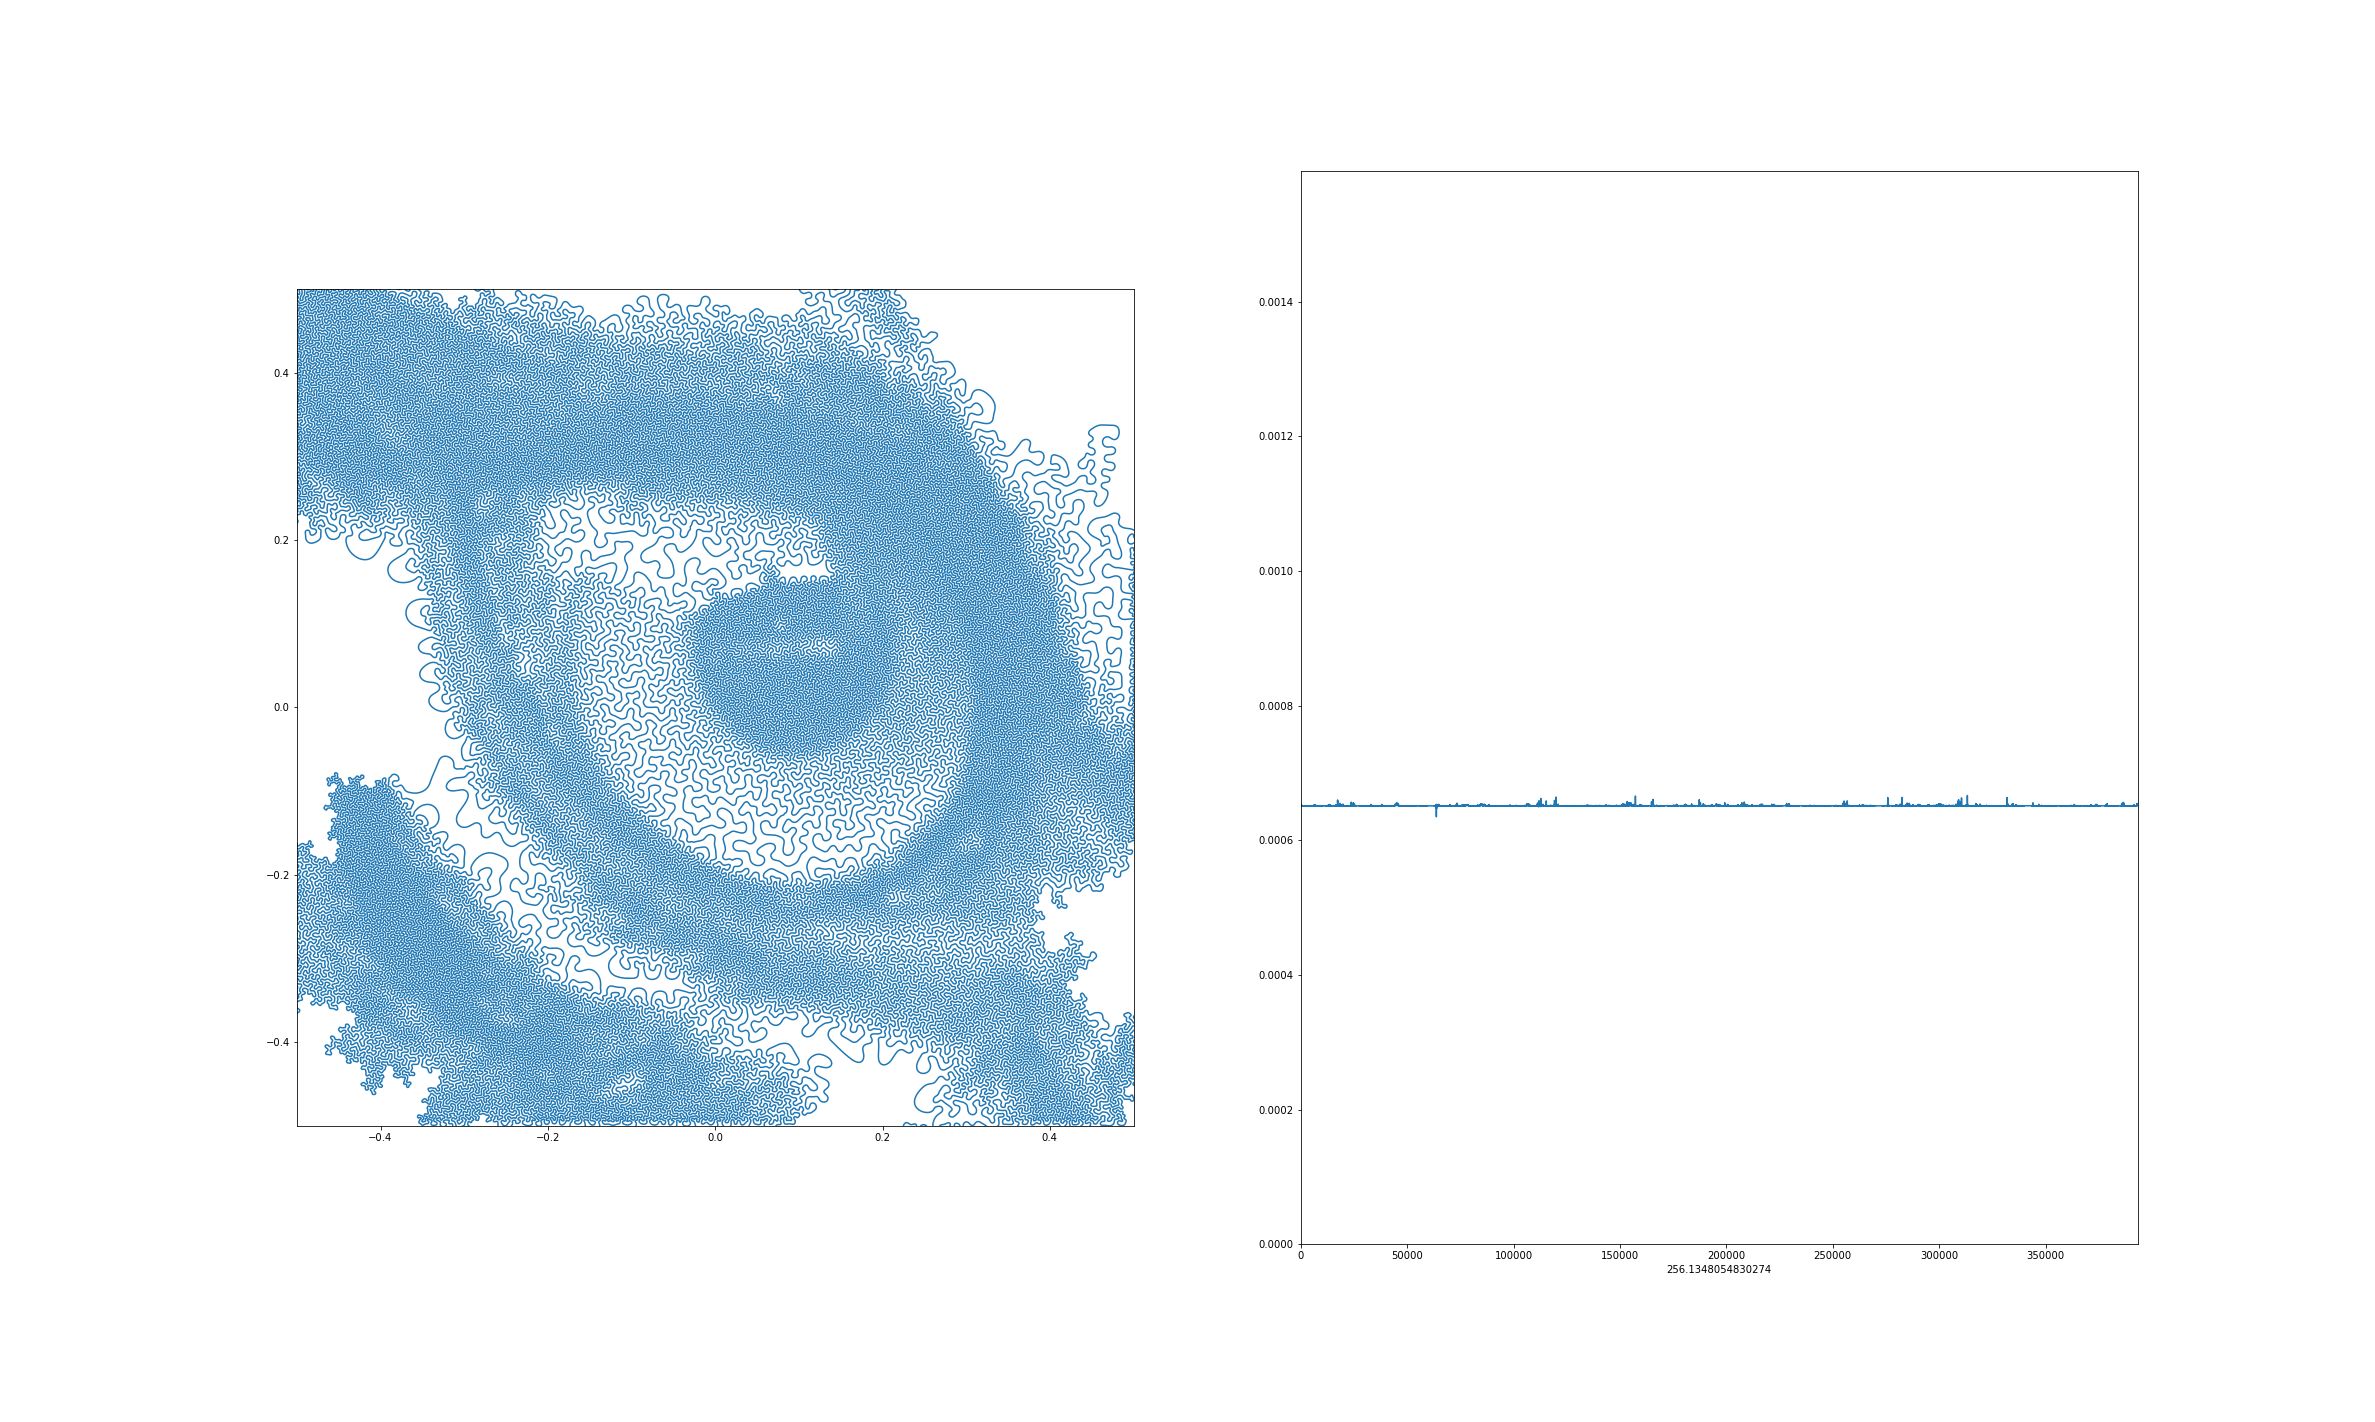

In [5]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(121)
#ax.axis(np.array([-0.28,-0.26,0.26,0.28]))
#ax.axis(np.array([0.21,0.24,-0.44,-0.42]))
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points_new.coords[:,0],points_new.coords[:,1])#,marker='*',markersize=2)
ax.add_line(line)
bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,1/np.sqrt(m)]))
bx.set_xlabel(np.sum(energy._eval_lengths(points_new.coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points_new.coords))
bx.add_line(distance)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    distance.set_ydata(energy._eval_lengths(p.coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.coords)))
    fig.canvas.draw()
    return


In [126]:
#energy._alpha =.00000010
energy._L =np.sqrt(m/3)#15#3.030#
energy._alpha = 10000/energy._L**5#2**(-5/2*9)/10
method= lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
#points_new.coords[:] = points.coords[:]
for i in range(1):
    points_new = method.run(energy,points_new)

Initial value: f[0] = 0.0012303393813939715
f[1] = 0.001007105771336668
f[2] = 0.0008788518421295492
f[3] = 0.0007954307674782983
f[4] = 0.0007465302136632616
f[5] = 0.0007140073633778733
f[6] = 0.0007040471567955045
f[7] = 0.0007005716374809319
f[8] = 0.0006988250641488219
f[9] = 0.000697962067147802
f[10] = 0.0006972309533233947
f[11] = 0.0006968642014674931
f[12] = 0.0006964305764953175
f[13] = 0.0006959364913156656
f[14] = 0.000695221321955947
f[15] = 0.0006944759532125886
f[16] = 0.0006937952884593747
f[17] = 0.0006932438139905774
f[18] = 0.0006926269781578135
f[19] = 0.000692130786748099
f[20] = 0.0006916474557270211
f[21] = 0.0006911695317131581
f[22] = 0.0006906778880411057
f[23] = 0.0006902343719994098
f[24] = 0.0006898847261796636
f[25] = 0.0006895679185582189
f[26] = 0.0006892033393117659
f[27] = 0.0006888475077988937
f[28] = 0.0006885183723268545
f[29] = 0.0006882254711318213
f[30] = 0.000688007051938085
f[31] = 0.0006878110889842941
f[32] = 0.0006876437828721687
f[33] = 0.

In [68]:
np.sum((m*energy._eval_lengths(points_new.coords)-energy._L)<0)

93

In [107]:
np.sum(energy._eval_lengths(points_new.coords))

31.98708263237529

In [117]:
"tiger_{}.txt".format(1)

'tiger_1.txt'

In [129]:
#points_new.coords = temp
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp